# Import required libraries

In [1]:
# Importing necessary libraries
import numpy as np  
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to suppress Future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fetch the data set

In [2]:
#list column names
column_names = ["poisonous", "cap-shape", "cap-surface", "cap-color","bruises","odor","gill-attachment",
               "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
               "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring",
               "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population",
               "habitat"]
#assign path to dataset
agaricus_lepiota_data_set = "agaricus-lepiota.data"

#fetch the dataset
df = pd.read_fwf(agaricus_lepiota_data_set, delimiter= ",", header=None, names=column_names)

In [3]:
#check sample data
df.head(10)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
#size of the dataset
df.shape

(8124, 23)

In [5]:
#list the columns and find data type of each of the columns
df.dtypes

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- observation: all columns are categorical types

In [7]:
#find duplicate rows in dataset
sum(df.duplicated())

0

In [8]:
#unique values and understanding their meanings
df['poisonous'].value_counts().reindex(['p','e'], fill_value=0)

p    3916
e    4208
Name: poisonous, dtype: int64

In [9]:
df['poisonous'].value_counts(normalize=True) * 100

e    51.797144
p    48.202856
Name: poisonous, dtype: float64

- observation: it is binary class classifiction problem. No class imbalance in the data.

# Univariate analysis

In [10]:
# Find all features and their missing values count
df.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- Observation:
There are no missing values in the data, which is good news.

Becaue ML models can't handle missing values directly and we need to treat them 
and this alters original dataset.

In [11]:
# number of unique values for each feature
df.nunique()

poisonous                    2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [12]:
# frequency of each feature's unique values
for i in column_names:
    print(df.groupby(i)['poisonous'].count().sort_values(ascending=False))

poisonous
e    4208
p    3916
Name: poisonous, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: poisonous, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: poisonous, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: poisonous, dtype: int64
bruises
f    4748
t    3376
Name: poisonous, dtype: int64
odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: poisonous, dtype: int64
gill-attachment
f    7914
a     210
Name: poisonous, dtype: int64
gill-spacing
c    6812
w    1312
Name: poisonous, dtype: int64
gill-size
b    5612
n    2512
Name: poisonous, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: poisonous, dtype: int64
stalk-shape
t    4608
e    3516
Name: poisonous, dtype: int64
stalk-root
b    3776
? 

In [15]:
# plot distribution of feature's unique values.
# visual plots are always effective to quickly analyse and grasp the trends.
# define a function that takes a group of variables (category) and plot/print all the value_counts and barplot.
def UVA_category(data, features):
    
  # setting figure_size
  size = len(features)
  plt.figure(figsize = (7*size,7), dpi = 100)

  # for every variable
  for j,i in enumerate(features):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

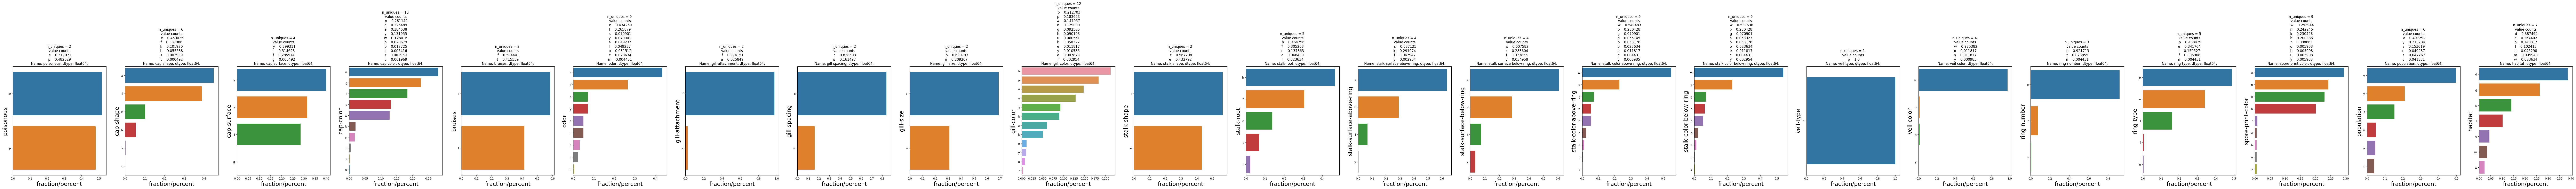

In [16]:
UVA_category(df, list(df))

## Insight from univariate analysis

- 22 features
- The target has two classes and their distribution is: eidble ~ 52%, poisonous 48%. 
    - Therefore, the dataset does not have class imbalance. This is good news becuase class imbalance brings new challenges.
- No duplicate rows or cloumns in the data
- 8124 instances
- "veil-type" feature has only one value. Therefore it does not carry any signal/ information and should be dropped.
- "stalk-root" feature has some missing values and these are categorised into seperate category - '?'
- From the nature of features, tree based algorithms(decision tree, random forrest, gradient boosting, etc.) and kNN are
    potentiall candidates for predictive modelling

In [17]:
#drop "veil-type" from the data
df2 = df.drop('veil-type', axis=1)
df2

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


# Bivariate analysis

## Analyse strength of relationship between features and target

The next step is to analyse signficance of each of the features in predicting target variable class.
We have to analyse statistical significance of association between target('poisonous') and categorical features.

In the data, both input features and target variable are categorical nature.
Chi-Square Test is used to determine if there is a significant association between two categorical variables.
An effect size metric for the chi-square test of independence is Cramer's V.
Cramer's V can be used to measure strength of the relationship between two categorical variables with two or more unique values per variable.

Crammer's V is computed by taking the square root of the chi-squared statistic divided by the sample size and the minimum dimension minus 1.

Its value varies from 0(stating no association between the attributes) to 1 (stating complete association between variables).

Effect size(ES) Interpretation
---------------------------------

ES > 0.6	    The result is strong. The fields are strongly associated.

0.2 < ES ≤ 0.6	The result is moderate. The fields are moderately associated.

ES ≤ 0.2	    The result is weak. The fields are only weakly associated.

It reaches a value of 1 only when an attribute is completely determined by the other attribute.

In [18]:
#define a function to calculate Cramer’s V correlation
def cramerV(data):
    total = data.sum().sum()
    chi2 = stats.chi2_contingency(data)[0]
    phi2 = chi2/total
    r, k = data.shape
    phi2corr = max(0,phi2-((k-1)*(r-1))/(total-1))
    rcorr = r-((r-1)**2)/(total-1)
    kcorr = k-((k-1)**2)/(total-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [19]:
#calculate cramerV for every category feature against target class
cramerv_values = {}
for col in df2.columns:
    data = pd.crosstab(df2[col], df2['poisonous'])
    score = cramerV(data)
    cramerv_values[col] = score

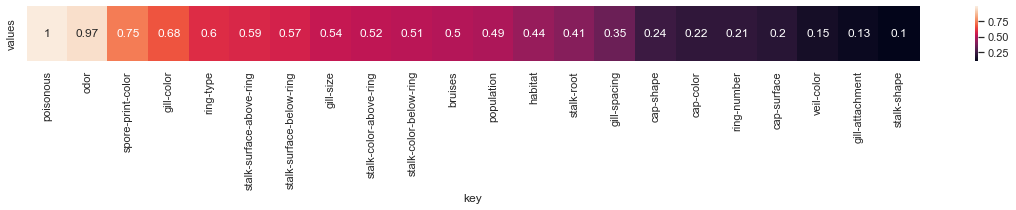

In [20]:
#plot heat map
cramerv_df = pd.DataFrame()
cramerv_df['values'] = cramerv_values.values()
cramerv_df['key'] = cramerv_values.keys()
cramerv_df.set_index('key', inplace=True)
cramerv_df_sorted = cramerv_df.sort_values(by='values', ascending=False).T

sns.set_theme()
plt.figure(figsize=(20,1))
sns.heatmap(cramerv_df_sorted, annot=True);

In [21]:
#print cramerv values
print(cramerv_df_sorted.T)

                            values
key                               
poisonous                 0.999753
odor                      0.970558
spore-print-color         0.752036
gill-color                0.679877
ring-type                 0.602900
stalk-surface-above-ring  0.587666
stalk-surface-below-ring  0.574551
gill-size                 0.539677
stalk-color-above-ring    0.523943
stalk-color-below-ring    0.513799
bruises                   0.501188
population                0.486775
habitat                   0.439323
stalk-root                0.406224
gill-spacing              0.347897
cap-shape                 0.244330
cap-color                 0.215889
ring-number               0.214212
cap-surface               0.195997
veil-color                0.152222
gill-attachment           0.127951
stalk-shape               0.101170


## Observation

Cramer's V value above 0.6 indicates strong association between feature and target class.

- 3 features have very high association: 
    - "odor" (0.97)
    - "spore-print-color" (0.75)
    - "gill-color" (0.68)

- 10 features are moderatelty associated.
    - "ring_type" (0.6)
    - "stalk-surface-above-ring" (0.59)
    - "stalk-surface-below-ring" (0.57)
    - "gill-size" (0.54)
    - "stalk-color-above-ring" (0.52)
    - "stalk-color-below-ring" (0.51)
    - "bruises" (0.5)
    - "population" (0.49)
    - "habitat" (0.44)
    - "stalk-root" (0.41)
    - "gill-spacing" (0.35)

# Analyse association between these features

In [22]:
# between "odor" and "spore-print-color"
cramerV(pd.crosstab(df2['odor'], df2['spore-print-color']))

0.3953398596906631

In [23]:
# between "odor" and "gill-color"
cramerV(pd.crosstab(df2['odor'], df2['gill-color']))

0.3887122490958364

In [24]:
# between "spore-print-color" and "gill-color"
cramerV(pd.crosstab(df2['spore-print-color'], df2['gill-color']))

0.4840832004820434

There is no strong association between these independent features.

# Feature Engineering with newly created dataset

## Explore these 3 feature in more detail

In [25]:
#define a function to plot counts of feature values against target
def categorical_plot(data, tar, cat):
    """
    take a feature and target variable and
    print countplot and Crosstab
    """
    #isolate the variables
    data = data[[cat, tar]][:]
    
    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])
    f_obs = np.array([table.iloc[0][:].values,
                      table.iloc[1][:].values])
        
    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    
    #plotting percentage stacked bar plot
    ax1=data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True', title=str(ax1))
    int_level = data[cat].value_counts()

## odor

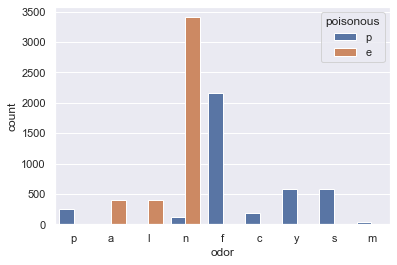

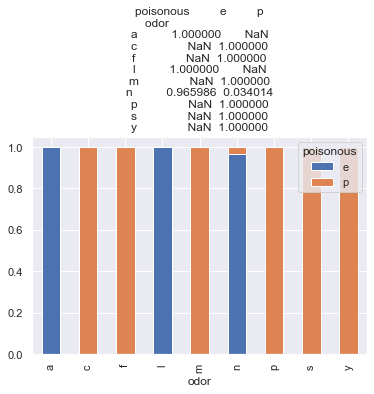

In [27]:
categorical_plot(df, 'poisonous', 'odor')

- Observation:

    - when the feature has value in ['c', 'f', 'm', 'p', 's', 'y'] then target class is always 'poisionious'
    
        - therefore we can replace all of them with single unique value.
        
    - when the feature has value in ['a','l'] then target class is always 'edible'.
    
         - therefore we can replace these with single unique value.
         
        
we are doing this to minimize number of input features to the ML models 
    when one-hot encoding is done at pre processing stage.

In [28]:
df2['odor'] = df2['odor'].replace(['c', 'f', 'm', 'p', 's', 'y'],'c')
df2['odor'] = df2['odor'].replace(['a','l'], 'a')

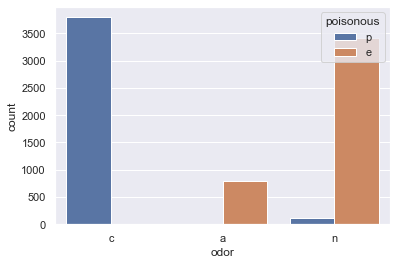

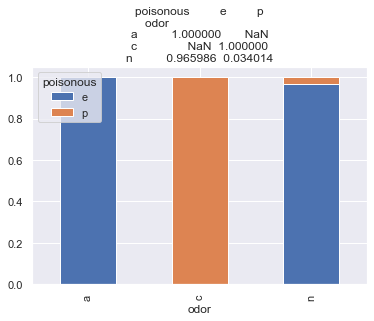

In [29]:
#plot the distribution of 'odor' using grouped bar plot
categorical_plot(df2, 'poisonous', 'odor')

## spore-print-color

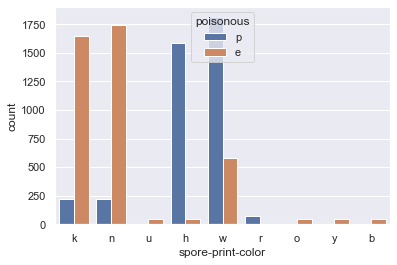

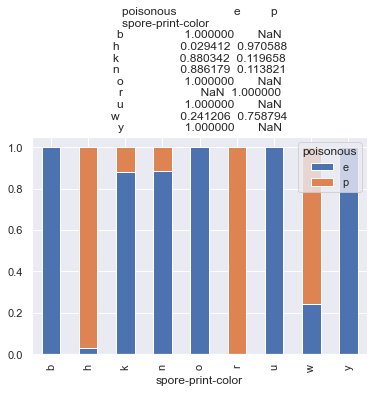

In [30]:
categorical_plot(df, 'poisonous', 'spore-print-color')

- Observation:
    
    - when the feature has value in ['b', 'o', 'u', 'y'] then target class is always 'edible'.
    
        - therefore we can replace all of these values with single unique value.

In [31]:
df2['spore-print-color'] = df2['spore-print-color'].replace(['b', 'o', 'u', 'y'],'b')

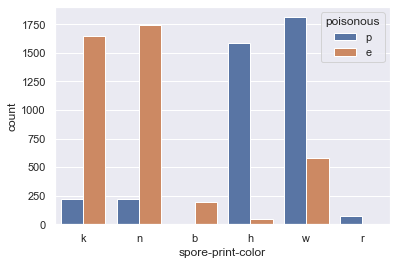

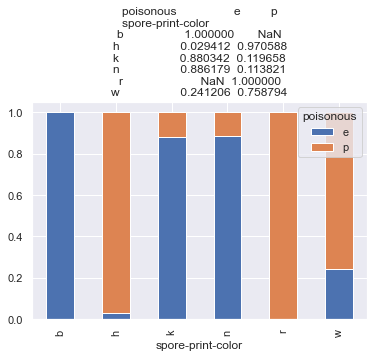

In [32]:
categorical_plot(df2, 'poisonous', 'spore-print-color')

## gill-color

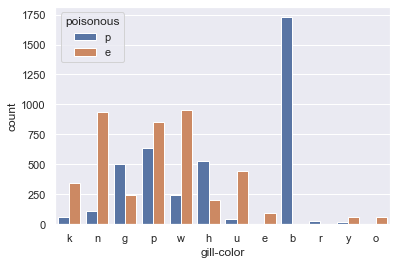

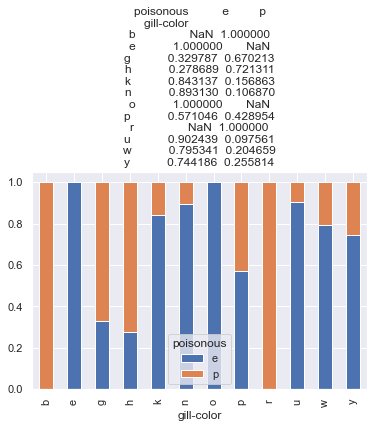

In [33]:
categorical_plot(df2, 'poisonous', 'gill-color')

-Observation:
    
    - when the feature 'gill-color' has value in ['b','r'] then target class is always 'poisonous'.
    
         - replace these two values with single unique value
        
    - when the feature 'gill-color' has value in ['e', 'o'] then target class is always 'edible'
    
         - replace these two values with single unique value
        

In [34]:
df2['gill-color'] = df2['gill-color'].replace(['b','r'],'b')
df2['gill-color'] = df2['gill-color'].replace(['e', 'o'],'e')

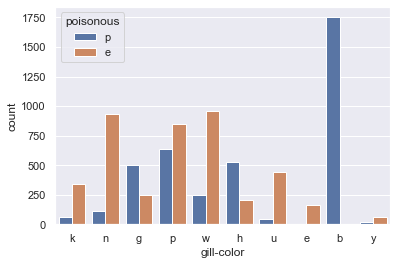

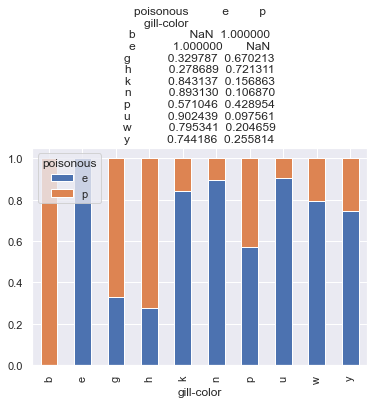

In [35]:
categorical_plot(df2, 'poisonous', 'gill-color')

# Refine dataset by keeping only important features

Create dataset with features that have strong association(high cramerV) with the target variable.

In [36]:
features_with_high_assoc_to_target = ['odor','spore-print-color','gill-color','poisonous']

In [37]:
# keep only features that have high association with target and target variables
updated_df = df2[features_with_high_assoc_to_target]

In [38]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   odor               8124 non-null   object
 1   spore-print-color  8124 non-null   object
 2   gill-color         8124 non-null   object
 3   poisonous          8124 non-null   object
dtypes: object(4)
memory usage: 254.0+ KB


# Prepare data for modelling

Seperate independent features and target variable

In [40]:
# target
y = updated_df['poisonous']
# independent features
x = updated_df.drop(['poisonous'], axis=1)

## Issue with categorical data

Some algorithms can handle categorical data directly. e.g., a decision tree can be learned directly from 
categorical data and no data transformation required.

however, many machine learning algortihms can not handle categorical data directly.
They all require independent features and our variable to be numeric. This means that categorical data must
be converted to a numerical form.

When there is no ordinal relationship for categorical variables, one hot encoding can be used.
One hot encoding is a technique that is used to represent categorical variables as numerical values 
in a machine learning model. It allows the use of categorical variables in models that require numerical input.


In [41]:
# encode all categorical feature
x_encoded = pd.get_dummies(x)

In [42]:
# split the data for training and 
x_train, x_test, y_train , y_test = train_test_split(x_encoded,y, test_size = 0.2, random_state=108)

In [43]:
# Label Encoder for Output
le = LabelEncoder()

y_tr = le.fit_transform(y_train)
y_te = le.transform(y_test)

#print(le.classes_)
#print(le.transform(["e", "p"]))

['e' 'p']
[0 1]


# Model evaluation

In [44]:
#define function to calculate accuracy score, classification report and confusion matrix
def model_evaluation(actual, predicted):
    print(f'Accuracy_score :\n {accuracy_score(actual, predicted)}')
    print(f'Classification Report :\n {classification_report(actual, predicted)}')
    print(f'Confusion Matrix :\n {confusion_matrix(actual, predicted)}')

# Train models

## Decision tree 

In [45]:
#creating decision tree function instance
dt_clf = tree.DecisionTreeClassifier(random_state =10) 

In [46]:
#fitting the model
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [47]:
y_pred = dt_clf.predict(x_test)

In [49]:
#checcking the training score
dt_clf.score(x_train, y_train) # this returns accuracy of the model.

0.99523003539006

In [50]:
#checking the test score
dt_clf.score(x_test, y_test)

0.992

In [51]:
model_evaluation(y_test, y_pred)

Accuracy_score :
 0.992
Classification Report :
               precision    recall  f1-score   support

           e       0.98      1.00      0.99       851
           p       1.00      0.98      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix :
 [[851   0]
 [ 13 761]]


## print decision tree

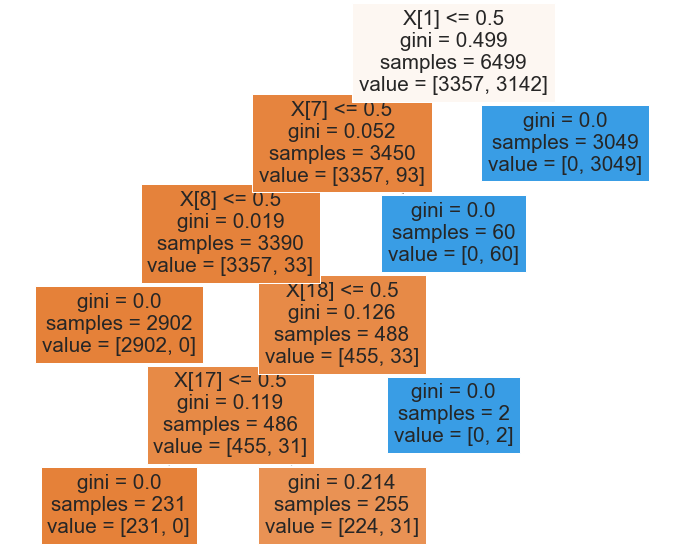

In [53]:
plt.figure(figsize = (12,10))
tree.plot_tree(dt_clf, filled = True)
plt.show()

## KNeighbors

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train, y_tr)
y_pred = knn_clf.predict(x_test)

In [55]:
y_train_model = knn_clf.predict(x_train) 
accuracy_score(y_tr, y_train_model)

0.9949222957378058

In [56]:
model_evaluation(y_te, y_pred)

Accuracy_score :
 0.9907692307692307
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       851
           1       1.00      0.98      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix :
 [[851   0]
 [ 15 759]]


## Random Forest

In [57]:
#creating RandomForest instance
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_tr)

y_pred = rf_clf.predict(x_test)

In [58]:
y_train_model = rf_clf.predict(x_train) 
accuracy_score(y_tr, y_train_model)

0.99523003539006

In [59]:
model_evaluation(y_te, y_pred)

Accuracy_score :
 0.992
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       851
           1       1.00      0.98      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix :
 [[851   0]
 [ 13 761]]


## XGBM

In [60]:
#creating an extreme Gradient boosting instance
xgb_clf = XGBClassifier(random_state=96)

In [61]:
#training the model
xgb_clf.fit(x_train,y_tr)

[15:07:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/srikanthlavu/miniconda3/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
#calculating score on training data
xgb_clf.score(x_train,y_tr)

0.9949222957378058

In [63]:
#calculating score on training data
xgb_clf.score(x_test,y_te)

0.9907692307692307

In [64]:
y_pred = xgb_clf.predict(x_test)

In [65]:
model_evaluation(y_te, y_pred)

Accuracy_score :
 0.9907692307692307
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       851
           1       1.00      0.98      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix :
 [[851   0]
 [ 15 759]]


# SVM

In [66]:
#Creating instance of SVC
sv_clf = SVC()
#fitting the model
sv_clf.fit(x_train, y_tr)

SVC()

In [67]:
#predicting over the train set
train_predict = sv_clf.predict(x_train)
k = sv_clf.score(x_train, y_tr)
print('Training Score', k)

Training Score 0.99523003539006


In [68]:
#predicting over the test set
train_predict = sv_clf.predict(x_test)
k = sv_clf.score(x_test, y_te)
print('Testing Score', k)

Testing Score 0.992


In [69]:
y_pred = sv_clf.predict(x_test)

In [70]:
model_evaluation(y_te, y_pred)

Accuracy_score :
 0.992
Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       851
           1       1.00      0.98      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix :
 [[851   0]
 [ 13 761]]
